# Electrical Fault detection and Classification using various models

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import sklearn 
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Importing the data
df = pd.read_csv('classData.csv')
df1 = pd.read_csv('detect_dataset.csv')
import os
for dirname, _, filenames in os.walk('F:\pytho\Project\Fault detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if(filename == 'detect_dataset.csv'):
            detection_train = pd.read_csv(dirname + '/' + filename).dropna(axis=1)
        if(filename == 'classData.csv'):
            class_train = pd.read_csv(dirname + '/' + filename).dropna(axis=1)

features=['Ia','Ib','Ic','Va','Vb','Vc']
class_target = ['G','C','B','A']

F:\pytho\Project\Fault detection\classData.csv
F:\pytho\Project\Fault detection\detect_dataset.csv
F:\pytho\Project\Fault detection\Fault Analysis.ipynb
F:\pytho\Project\Fault detection\Untitled.ipynb
F:\pytho\Project\Fault detection\.ipynb_checkpoints\Fault Analysis-checkpoint.ipynb
F:\pytho\Project\Fault detection\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [3]:
class_train

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [4]:
detection_train

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


<AxesSubplot:>

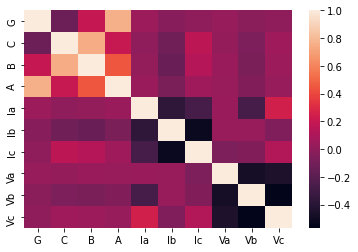

In [5]:
# correlation in the data
sns.heatmap(df.corr())

<Figure size 1728x576 with 0 Axes>

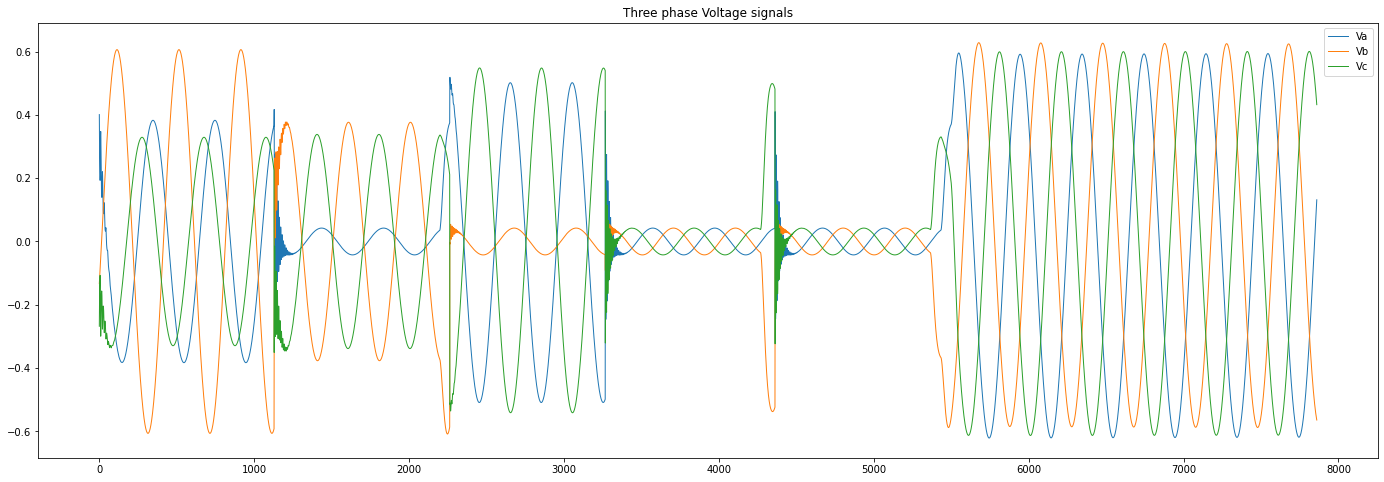

In [6]:
plt.figure(figsize=(24, 8))
plt.figure(figsize=(24, 8))
plt.plot(df.Va, label= 'Va', linewidth=1)
plt.plot(df.Vb, label= 'Vb', linewidth=1)
plt.plot(df.Vc, label= 'Vc', linewidth=1)
plt.title("Three phase Voltage signals")
plt.legend()
plt.show()

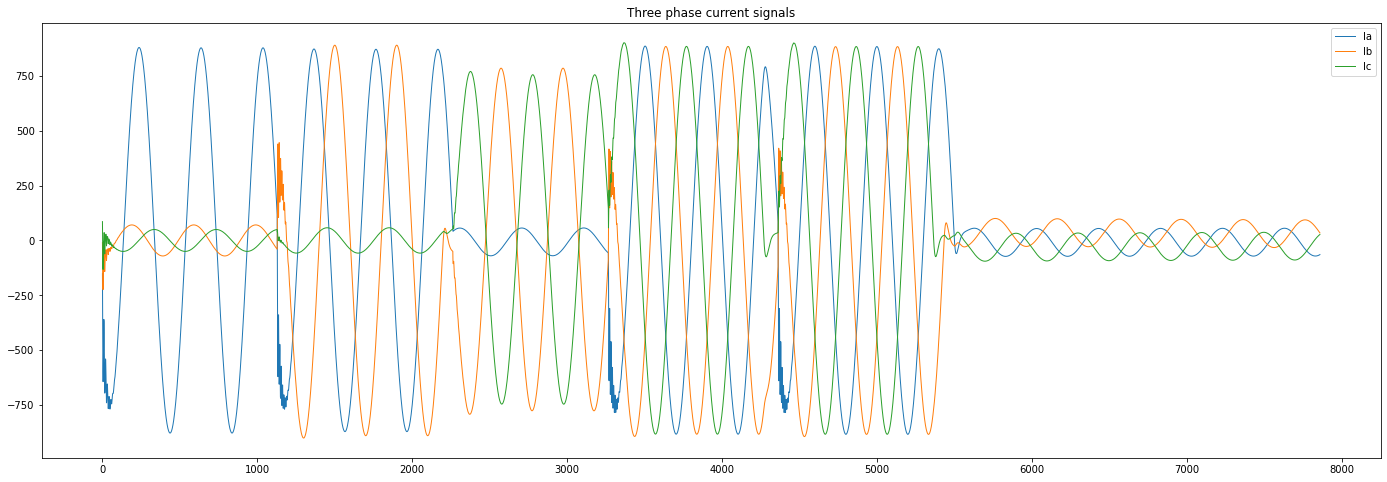

In [7]:
plt.figure(figsize=(24, 8))
plt.plot(df.Ia, label= 'Ia', linewidth=1)
plt.plot(df.Ib, label= 'Ib', linewidth=1)
plt.plot(df.Ic, label= 'Ic', linewidth=1)
plt.title("Three phase current signals")
plt.legend()
plt.show()

In [8]:
# plt.figure(figsize=(24,8))
# plt.plot(df.G, label= 'G')
# plt.plot(df.A, label= 'A')
# plt.plot(df.B, label= 'B')
# plt.plot(df.C, label= 'C')
# plt.title("Fault Duration")
# plt.legend()
# plt.show()

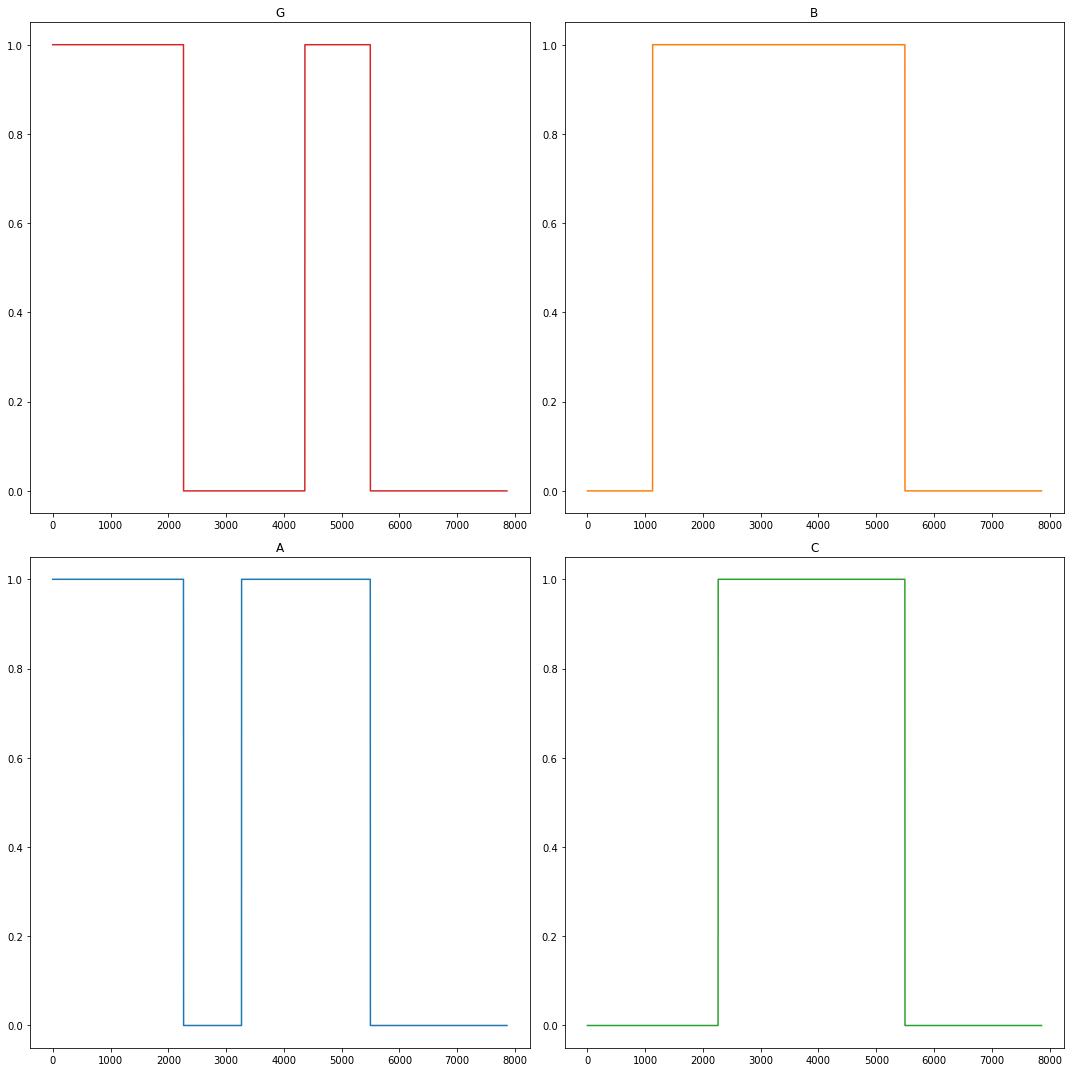

In [9]:
f, axs = plt.subplots(2,2,figsize=(15,15))
axs[0, 0].plot(df.G, 'tab:red'); axs[0, 0].set_title("G")
axs[1, 0].plot(df.A, 'tab:blue' ); axs[1, 0].set_title("A")
axs[0, 1].plot(df.B, 'tab:orange'); axs[0, 1].set_title("B")
axs[1, 1].plot(df.C, 'tab:green'); axs[1, 1].set_title("C")
f.tight_layout()

In [10]:
df.iloc[:, 0:4].value_counts()

G  C  B  A
0  0  0  0    2365
1  0  1  1    1134
   1  1  1    1133
   0  0  1    1129
0  1  1  1    1096
         0    1004
dtype: int64

In [11]:
df1.iloc[:, 0].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

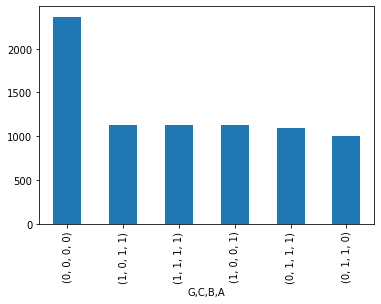

In [12]:
df.iloc[:, 0:4].value_counts().plot(kind='bar');

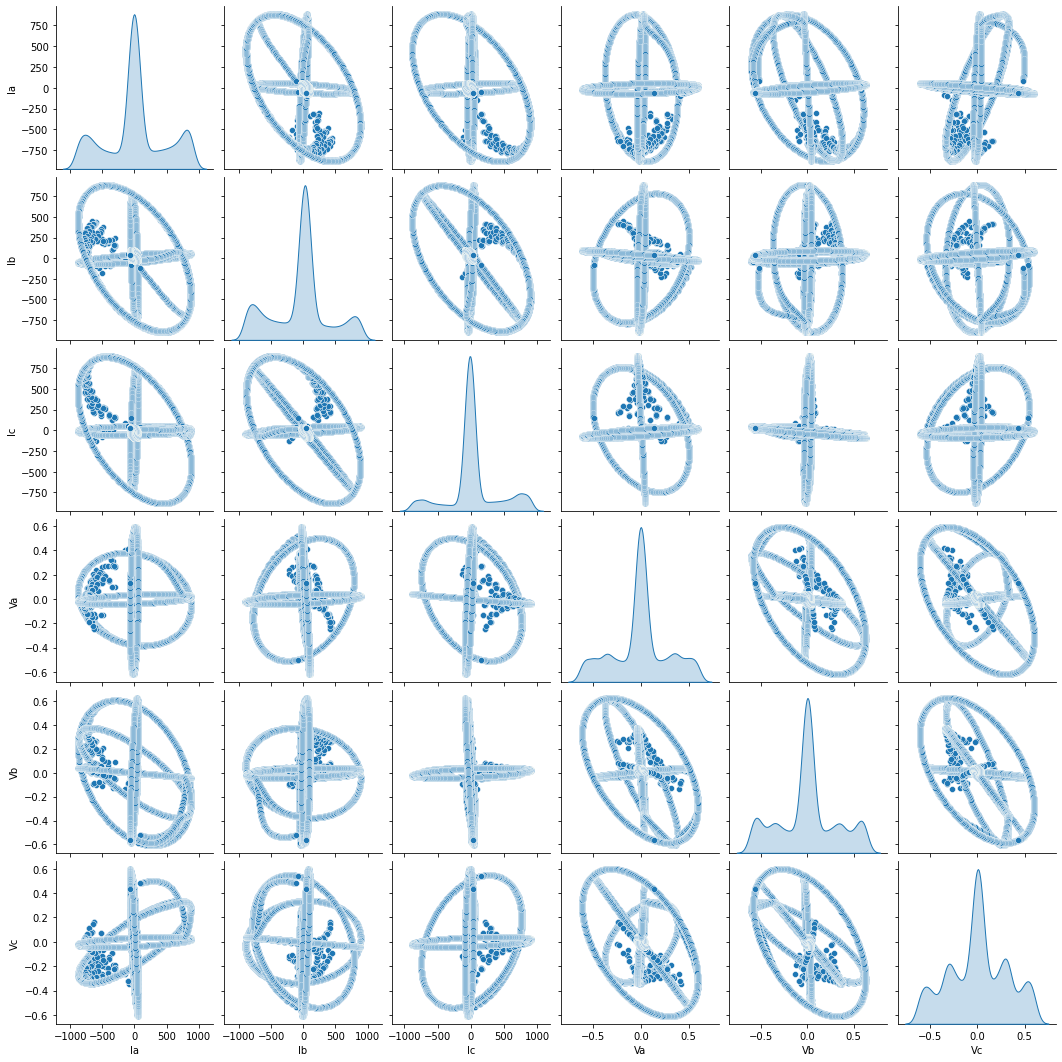

In [13]:
df2= df.iloc[:, 4:10]
sns.pairplot(df2, diag_kind='kde')

In [14]:
#Defining the inputs and outputs
detection_data_X = detection_train[features]
class_data_X = class_train[features]
detection_data_Y = detection_train['Output (S)']
class_data_Y = class_train[class_target]

#Defining accuracy and error vectors
detect_accuracy = list()
detect_error = list()
class_accuracy = list()
class_error = list()

In [15]:
#Splitting the data 
class_train_X,class_test_X,class_train_Y,class_test_Y = train_test_split(class_data_X,class_data_Y,test_size=0.33,random_state=1)

detection_train_X,detection_test_X,detection_train_Y,detection_test_Y = train_test_split(detection_data_X,detection_data_Y,test_size=0.33,random_state=1)

# Linear regression

In [16]:
#Defining different Models for different classification problems
detection_model = linear_model.Lasso(alpha = 2.0)
class_model = LinearRegression()

In [17]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']*2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

LinearRegression()

In [18]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))
class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))
#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.2437574362244484
The Error of our Classification Model is:  17.30156901250009


In [19]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))
#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.017945755271095987
The accuracy score of our Classification Model is:  0.033497074461529164


# Logistic regression

In [20]:
#Defining different Models for different classification problems
detection_model = LogisticRegression()
class_model = LogisticRegression(max_iter=500)

In [21]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']*2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

LogisticRegression(max_iter=500)

In [22]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))
class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))
#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.26155011360767483
The Error of our Classification Model is:  41.99614643545279


In [23]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.7384498863923251
The accuracy score of our Classification Model is:  0.3279383429672447


# Naive Bayes

In [24]:
#Defining different Models for different classification problems
detection_model = GaussianNB()
class_model = GaussianNB()

In [25]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']*2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

GaussianNB()

In [26]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))
class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))
#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.019439535470840697
The Error of our Classification Model is:  2.1078998073217727


In [27]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))
#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9805604645291593
The accuracy score of our Classification Model is:  0.796917148362235


# Decision Tree classifier

In [28]:
#Defining different Models for different classification problems
detection_model = DecisionTreeClassifier()
class_model = DecisionTreeClassifier()

In [29]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A'] *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

DecisionTreeClassifier()

In [30]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))
class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))
#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.005806614491290078
The Error of our Classification Model is:  0.30327552986512524


In [31]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))
#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.99419338550871
The accuracy score of our Classification Model is:  0.864354527938343


# SVM

In [32]:
#Defining different Models for different classification problems
detection_model = SVC()
class_model = LinearSVC()

In [33]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']*2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [34]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))
class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))
#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.01792476647311285
The Error of our Classification Model is:  28.734104046242773


In [35]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))
#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9820752335268872
The accuracy score of our Classification Model is:  0.297495183044316


# Model selection

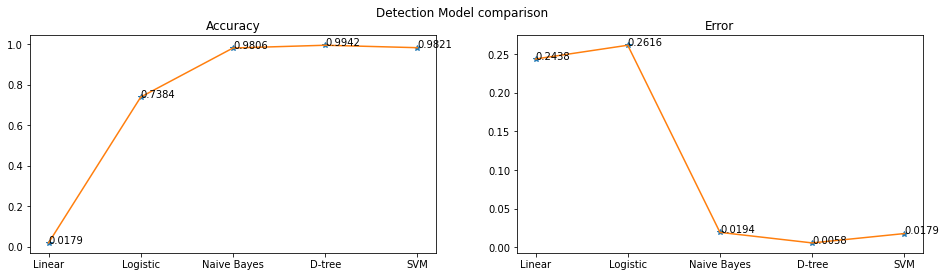

In [36]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Model comparison')
x = [0,1,2,3,4]
ax[0].set_xticks(x)
ax[0].set_xticklabels(['Linear','Logistic','Naive Bayes','D-tree','SVM'])
ax[0].set_title('Accuracy')
ax[0].plot(detect_accuracy,'*')
ax[0].plot(detect_accuracy)
for i in range(len(detect_accuracy)):
    detect_accuracy[i] = round(detect_accuracy[i],4)
for i,j in zip(x,detect_accuracy):
    ax[0].annotate(str(j),xy=(i,j))
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Linear','Logistic','Naive Bayes','D-tree','SVM'])
ax[1].set_title('Error')
ax[1].plot(detect_error,'*')
ax[1].plot(detect_error)
for i in range(len(detect_error)):
    detect_error[i] = round(detect_error[i],4)
for i,j in zip(x,detect_error):
    ax[1].annotate(str(j),xy=(i,j))

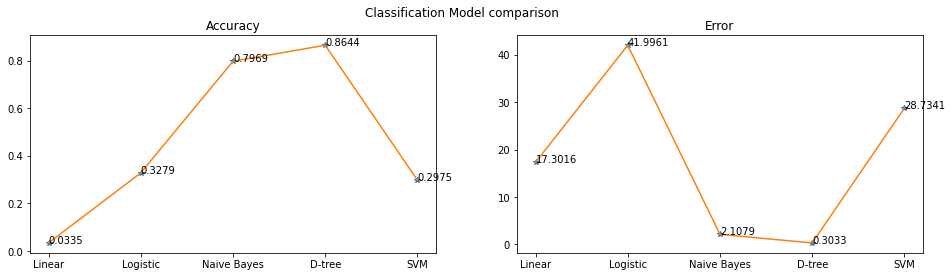

In [37]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Model comparison')
x = [0,1,2,3,4]
ax[0].set_xticks([0,1,2,3,4])
ax[0].set_xticklabels(['Linear','Logistic','Naive Bayes','D-tree','SVM'])
ax[0].set_title('Accuracy')
ax[0].plot(class_accuracy,'*')
ax[0].plot(class_accuracy)
for i in range(len(class_accuracy)):
    class_accuracy[i] = round(class_accuracy[i],4)
for i,j in zip(x,class_accuracy):
    ax[0].annotate(str(j),xy=(i,j))
ax[1].set_xticks([0,1,2,3,4])
ax[1].set_xticklabels(['Linear','Logistic','Naive Bayes','D-tree','SVM'])
ax[1].set_title('Error')
ax[1].plot(class_error,'*')
ax[1].plot(class_error)
for i in range(len(class_error)):
    class_error[i] = round(class_error[i],4)
for i,j in zip(x,class_error):
    ax[1].annotate(str(j),xy=(i,j))